In [1]:
print("Team - 5")
print("Project Name - Heart Disease Prediction System.")
print("Module - Preprocessing, Data Cleaning and Exploratory Data Analysis.")
print("Dataset used - \'heart.csv'")

Team - 5
Project Name - Heart Disease Prediction System.
Module - Preprocessing, Data Cleaning and Exploratory Data Analysis.
Dataset used - 'heart.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv(r"C:\Users\HP\Downloads/heart.csv")

In [4]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
x=data.iloc[:,0:14].values
print(x)

[[63.  1.  3. ...  0.  1.  1.]
 [37.  1.  2. ...  0.  2.  1.]
 [41.  0.  1. ...  0.  2.  1.]
 ...
 [68.  1.  0. ...  2.  3.  0.]
 [57.  1.  0. ...  1.  3.  0.]
 [57.  0.  1. ...  1.  2.  0.]]


In [9]:
y=data.iloc[:,13].values
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [10]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [11]:
print(data.shape)

(303, 14)


In [12]:
# Checking for the missing values.
data.isnull().values.any()

False

In [13]:
missing_value_count_by_column=(data.isnull().sum())
print(missing_value_count_by_column[missing_value_count_by_column>0])

Series([], dtype: int64)


In [14]:
#Dropping columns with missing values
#data_without_missing_values=data.dropna(axis=1)
cols_with_missing=[col for col in data.columns if data[col].isnull().any()]
reduced_original_data=data.drop(cols_with_missing,axis=1)
reduced_test_data=data.drop(cols_with_missing,axis=1)

In [15]:
from sklearn.impute import SimpleImputer
my_imputer=SimpleImputer()
data_with_imputed_values=my_imputer.fit_transform(data)

In [16]:
#Catgorical data  
#for Country Variable  
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
x[:, 0]= label_encoder_x.fit_transform(x[:, 0]) 
print(x)

[[29.  1.  3. ...  0.  1.  1.]
 [ 3.  1.  2. ...  0.  2.  1.]
 [ 7.  0.  1. ...  0.  2.  1.]
 ...
 [34.  1.  0. ...  2.  3.  0.]
 [23.  1.  0. ...  1.  3.  0.]
 [23.  0.  1. ...  1.  2.  0.]]


In [17]:
labelencoder_y= LabelEncoder()  
y= labelencoder_y.fit_transform(y)  
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [22]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [23]:
print(x_train)

[[ 9.  0.  2. ...  0.  2.  1.]
 [32.  0.  2. ...  1.  2.  1.]
 [24.  1.  2. ...  0.  2.  1.]
 ...
 [22.  1.  3. ...  0.  3.  1.]
 [13.  1.  2. ...  0.  2.  1.]
 [24.  1.  1. ...  0.  2.  0.]]


In [24]:
print(x_test)

[[3.60e+01 1.00e+00 0.00e+00 1.45e+02 1.74e+02 0.00e+00 1.00e+00 1.25e+02
  1.00e+00 2.60e+00 0.00e+00 0.00e+00 3.00e+00 0.00e+00]
 [3.00e+01 1.00e+00 3.00e+00 1.70e+02 2.27e+02 0.00e+00 0.00e+00 1.55e+02
  0.00e+00 6.00e-01 1.00e+00 0.00e+00 3.00e+00 1.00e+00]
 [2.50e+01 1.00e+00 3.00e+00 1.70e+02 2.88e+02 0.00e+00 0.00e+00 1.59e+02
  0.00e+00 2.00e-01 1.00e+00 0.00e+00 3.00e+00 0.00e+00]
 [2.60e+01 1.00e+00 0.00e+00 1.25e+02 2.58e+02 0.00e+00 0.00e+00 1.41e+02
  1.00e+00 2.80e+00 1.00e+00 1.00e+00 3.00e+00 0.00e+00]
 [2.80e+01 1.00e+00 2.00e+00 1.30e+02 2.31e+02 0.00e+00 1.00e+00 1.46e+02
  0.00e+00 1.80e+00 1.00e+00 3.00e+00 3.00e+00 1.00e+00]
 [1.40e+01 1.00e+00 0.00e+00 1.24e+02 2.74e+02 0.00e+00 0.00e+00 1.66e+02
  0.00e+00 5.00e-01 1.00e+00 0.00e+00 3.00e+00 0.00e+00]
 [6.00e+00 1.00e+00 0.00e+00 1.10e+02 1.67e+02 0.00e+00 0.00e+00 1.14e+02
  1.00e+00 2.00e+00 1.00e+00 0.00e+00 3.00e+00 0.00e+00]
 [2.90e+01 1.00e+00 0.00e+00 1.30e+02 2.54e+02 0.00e+00 0.00e+00 1.47e+02
  0.00e+0

In [25]:
print(y_train)

[1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0]


In [26]:
print(y_test)

[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1]


In [29]:
#To fill in missing values by their mean values
data.fillna(data.mean(),inplace=True)

In [30]:
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [31]:
# Checking for the imbalanced data based on chol.
data['chol'].value_counts()

204    6
197    6
234    6
269    5
212    5
      ..
215    1
210    1
200    1
195    1
417    1
Name: chol, Length: 152, dtype: int64

In [32]:
# Checking for any correlations.
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

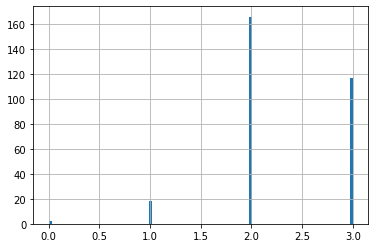

In [33]:
# histogram of thal.
data['thal'].hist(bins=100)

<AxesSubplot:xlabel='age', ylabel='count'>

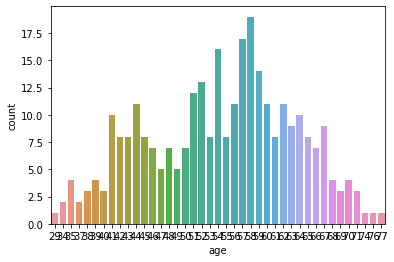

In [34]:
sns.countplot(x='age', data=data)

<AxesSubplot:>

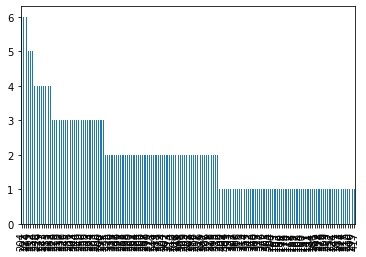

In [35]:
# bar chart -  distribution of a categorical variable
data['chol'].value_counts().plot.bar()

<AxesSubplot:>

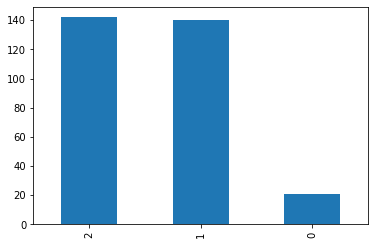

In [38]:
# bar chart -  distribution of a categorical variable
data['slope'].value_counts().plot.bar()

In [39]:
# Checking for the imbalanced data based on age.
data['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

In [40]:
# Checking for the missing values.
data.isnull().values.any()

False

In [47]:
print("The Dataset \'framingham.csv' is now cleaned.")

The Dataset 'framingham.csv' is now cleaned.
